<a href="https://colab.research.google.com/github/kauthar123/Patient_Stay_Prediction/blob/main/Patient_Stay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Predicting the number of days a patient stays in a hospital

Build a model to predict the length of stay of a patient given the readings and history from the time the patient got admitted.

##**Importing Libraries**

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #For visualizations
import warnings
warnings.filterwarnings('ignore')

# from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, MinMaxScaler#for Scalling feature data
from sklearn.impute import KNNImputer, SimpleImputer#for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder#for encoding categorical data


# splitting the data
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# for cross validation and hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error







##**CSV File Link From Google Drive**


URL for the given csv file: "https://drive.google.com/file/d/174EUZlmYJeSd0vAopfdYsAdpKf9GAg8e/view?usp=sharing"

##**Dataset Loading from Drive**

In [ ]:
url='https://drive.google.com/file/d/174EUZlmYJeSd0vAopfdYsAdpKf9GAg8e/view?usp=sharing'
print(url.split('/')[-2])
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
patients_data = pd.read_csv(url)

174EUZlmYJeSd0vAopfdYsAdpKf9GAg8e


##**Know Your Data**

###**Dataset First View**

In [ ]:
patients_data

,Id,ReadmissionCount,Gender,FacilityId,KidneyAilments,HeartAilments,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis,LengthOfStay
0,13564856414,2.0,F,1338,NaN,NaN,False,NaN,32.7,152.0,64.0,2.0,5
1,13564856415,1.0,F,4964,NaN,NaN,True,NaN,31.1,165.0,105.0,1.0,3
2,13564856416,NaN,M,7593,NaN,NaN,False,NaN,32.4,111.0,53.0,NaN,6
3,13564856417,NaN,M,1739,NaN,NaN,False,NaN,31.2,175.0,44.0,3.0,5
4,13564856418,NaN,M,1703,NaN,NaN,False,Yes,31.9,114.0,93.0,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,13564867408,2.0,M,3019,NaN,NaN,False,Yes,27.6,107.0,83.0,2.0,4
10995,13564867409,NaN,F,9036,NaN,NaN,False,NaN,26.5,133.0,69.0,2.0,2
10996,13564867410,1.0,F,1486,NaN,NaN,False,Yes,28.5,177.0,108.0,2.0,4
10997,13564867411,3.0,F,2590,NaN,NaN,False,Yes,NaN,138.0,NaN,2.0,3


### **Dataset Rows & Columns count**

###Dataset Dimensions

In [ ]:
patients_data.shape

(10999, 13)

###Dataset Columns

In [ ]:
patients_data.columns

Index(['Id', 'ReadmissionCount', 'Gender', 'FacilityId', 'KidneyAilments',
       'HeartAilments', 'PyschologicalAilments', 'SubstanceAbuseHistory',
       'BMI', 'ABG', 'Pulse', 'SecondaryDiagnosis', 'LengthOfStay'],
      dtype='object')

###Dataset Information

In [ ]:
patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     10999 non-null  int64  
 1   ReadmissionCount       5429 non-null   float64
 2   Gender                 10999 non-null  object 
 3   FacilityId             10999 non-null  int64  
 4   KidneyAilments         0 non-null      float64
 5   HeartAilments          0 non-null      float64
 6   PyschologicalAilments  10999 non-null  bool   
 7   SubstanceAbuseHistory  1527 non-null   object 
 8   BMI                    10997 non-null  float64
 9   ABG                    10999 non-null  float64
 10  Pulse                  10997 non-null  float64
 11  SecondaryDiagnosis     10760 non-null  float64
 12  LengthOfStay           10999 non-null  int64  
dtypes: bool(1), float64(7), int64(3), object(2)
memory usage: 1.0+ MB


###Duplicate Values

In [ ]:
len(patients_data[patients_data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
patients_data.isnull().sum()

Id                           0
ReadmissionCount          5570
Gender                       0
FacilityId                   0
KidneyAilments           10999
HeartAilments            10999
PyschologicalAilments        0
SubstanceAbuseHistory     9472
BMI                          2
ABG                          0
Pulse                        2
SecondaryDiagnosis         239
LengthOfStay                 0
dtype: int64

###Visualizing the Missing Values

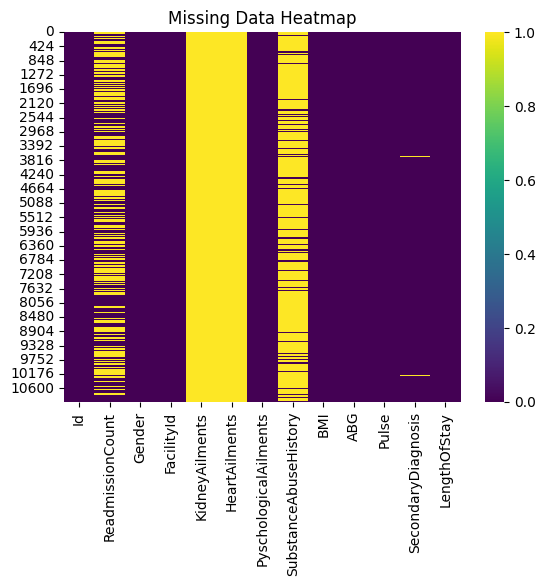

In [ ]:
# Visualizing the missing values
import missingno as msno


sns.heatmap(patients_data.isna(),cmap="viridis")

plt.title('Missing Data Heatmap')
plt.show()

###Dropping Columns With no Data

In [ ]:
print("Count of KidneyAilments:",patients_data['KidneyAilments'].count())
print("Count of HeartAilments:",patients_data['HeartAilments'].count())

Count of KidneyAilments: 0
Count of HeartAilments: 0


In [ ]:
del patients_data['KidneyAilments']
del patients_data['HeartAilments']
patients_data

,Id,ReadmissionCount,Gender,FacilityId,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis,LengthOfStay
0,13564856414,2.0,F,1338,False,NaN,32.7,152.0,64.0,2.0,5
1,13564856415,1.0,F,4964,True,NaN,31.1,165.0,105.0,1.0,3
2,13564856416,NaN,M,7593,False,NaN,32.4,111.0,53.0,NaN,6
3,13564856417,NaN,M,1739,False,NaN,31.2,175.0,44.0,3.0,5
4,13564856418,NaN,M,1703,False,Yes,31.9,114.0,93.0,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...
10994,13564867408,2.0,M,3019,False,Yes,27.6,107.0,83.0,2.0,4
10995,13564867409,NaN,F,9036,False,NaN,26.5,133.0,69.0,2.0,2
10996,13564867410,1.0,F,1486,False,Yes,28.5,177.0,108.0,2.0,4
10997,13564867411,3.0,F,2590,False,Yes,NaN,138.0,NaN,2.0,3


###Dataset Columns

In [ ]:
patients_data.columns

Index(['Id', 'ReadmissionCount', 'Gender', 'FacilityId',
       'PyschologicalAilments', 'SubstanceAbuseHistory', 'BMI', 'ABG', 'Pulse',
       'SecondaryDiagnosis', 'LengthOfStay'],
      dtype='object')

In [ ]:
patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     10999 non-null  int64  
 1   ReadmissionCount       5429 non-null   float64
 2   Gender                 10999 non-null  object 
 3   FacilityId             10999 non-null  int64  
 4   PyschologicalAilments  10999 non-null  bool   
 5   SubstanceAbuseHistory  1527 non-null   object 
 6   BMI                    10997 non-null  float64
 7   ABG                    10999 non-null  float64
 8   Pulse                  10997 non-null  float64
 9   SecondaryDiagnosis     10760 non-null  float64
 10  LengthOfStay           10999 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 870.2+ KB


In [ ]:
# missing columns

missing_value_columns = patients_data.columns[patients_data.isnull().any()].tolist()
missing_value_columns

['ReadmissionCount',
 'SubstanceAbuseHistory',
 'BMI',
 'Pulse',
 'SecondaryDiagnosis']

### Dataset overview

The dataset contains information on the number of days a patient stays in a hospital based on demographic factors, some sample test data, history of readmission, and secondary diagnosis of patients in a hospital.

It consists of 10,999 rows and 13 columns. It was observed that there are no duplicate values,  but there are two columns with no values in the dataset, so those columns have been dropped from the dataset (KidneyAilments and HeartAilments).

There are 11 Independent features after deleting two and LengthOfStay is the target variable. Some independent features are categorical and boolean variables like Gender, PyschologicalAilments and SubstanceAbuseHistory.


# Variables Description


LengthOfStay: Number of days a patient stays in the hospital (target variable).

Id: Unique identifier for each patient.

ReadmissionCount: Number of times a patient has been readmitted.

Gender: Gender of the patient.

FacilityId: Identifier for the facility.

KidneyAilments: Presence of kidney ailments.

HeartAilments: Presence of heart ailments.

PyschologicalAilments: Presence of psychological ailments.

SubstanceAbuseHistory: History of substance abuse.

BMI: Body Mass Index.

ABG: Arterial blood gas levels.

Pulse: Pulse rate.

SecondaryDiagnosis: might be secondary diagnosis code or category.

In [ ]:
# Checking Unique Values for each variable.
for i in patients_data.columns.tolist():
  print('unique values in ',i, 'are', patients_data[i].nunique())

unique values in  Id are 10999
unique values in  ReadmissionCount are 5
unique values in  Gender are 2
unique values in  FacilityId are 6638
unique values in  PyschologicalAilments are 2
unique values in  SubstanceAbuseHistory are 5
unique values in  BMI are 140
unique values in  ABG are 201
unique values in  Pulse are 126
unique values in  SecondaryDiagnosis are 11
unique values in  LengthOfStay are 28


In [ ]:
considered_categorical_features = ['ReadmissionCount','Gender','SubstanceAbuseHistory','SecondaryDiagnosis']
for i in considered_categorical_features:
  print('value counts in ',i, 'are', patients_data[i].value_counts())

value counts in  ReadmissionCount are ReadmissionCount
1.0    2701
2.0    1422
3.0     736
4.0     380
5.0     190
Name: count, dtype: int64
value counts in  Gender are Gender
F    6011
M    4988
Name: count, dtype: int64
value counts in  SubstanceAbuseHistory are SubstanceAbuseHistory
Yes        1517
Some          3
Slight        3
Few           3
Unknown       1
Name: count, dtype: int64
value counts in  SecondaryDiagnosis are SecondaryDiagnosis
1.0     4196
2.0     2610
3.0     1568
4.0      946
5.0      545
6.0      363
7.0      221
8.0      133
0.0       81
9.0       59
10.0      38
Name: count, dtype: int64


**Observations**:

1.ReadmissionCount has only 5 values or categories which tells us count of times a patient has readmitted. This can be considered as a categorical value, as count of times a person readmitting might be related to the length of stay.

2.Substance history ia clearly categorical varible.

3.Secondarydiagnosis, as clear documentation is not given, according to values, it was decided to treat them as different codes or categories for each kind of disease they have apart from primary. So, it is also a categorical value.




#****Exploratory Data Analysis (EDA)****

####Creating a copy of dataset for EDA

In [ ]:
EDA_dataset = patients_data.copy()
EDA_dataset.head()

,Id,ReadmissionCount,Gender,FacilityId,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis,LengthOfStay
0,13564856414,2.0,F,1338,False,NaN,32.7,152.0,64.0,2.0,5
1,13564856415,1.0,F,4964,True,NaN,31.1,165.0,105.0,1.0,3
2,13564856416,NaN,M,7593,False,NaN,32.4,111.0,53.0,NaN,6
3,13564856417,NaN,M,1739,False,NaN,31.2,175.0,44.0,3.0,5
4,13564856418,NaN,M,1703,False,Yes,31.9,114.0,93.0,4.0,5


In [ ]:
EDA_dataset.describe(include="all")

,Id,ReadmissionCount,Gender,FacilityId,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis,LengthOfStay
count,1.099900e+04,5429.000000,10999,10999.000000,10999,1527,10997.000000,10999.000000,10997.000000,10760.000000,10999.000000
unique,NaN,NaN,2,NaN,2,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NaN,False,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6011,NaN,10396,1517,NaN,NaN,NaN,NaN,NaN
mean,1.356486e+10,1.883036,NaN,5005.584235,NaN,NaN,29.059925,142.644591,77.751023,2.446933,4.554232
std,3.175282e+03,1.102079,NaN,2872.477964,NaN,NaN,2.006137,30.329310,18.135555,1.779553,3.302963
min,1.356486e+10,1.000000,NaN,2.000000,NaN,NaN,19.800000,-1.010000,10.000000,0.000000,1.000000
25%,1.356486e+10,1.000000,NaN,2549.000000,NaN,NaN,27.700000,123.000000,65.000000,1.000000,2.000000
50%,1.356486e+10,2.000000,NaN,4994.000000,NaN,NaN,29.000000,143.000000,78.000000,2.000000,4.000000
75%,1.356486e+10,2.000000,NaN,7495.000000,NaN,NaN,30.400000,163.000000,90.000000,3.000000,6.000000


###Statistical Evaluation

**Insights**





1.   Readmission Count: Nearly 50% of patients are readmitted at least twice, and all patients have been readmitted at least once.

2.  Psychological Ailments: The majority of patients do not have psychological ailments.

3. Substance Abuse: A significant number of patients are struggling with substance abuse issues.

4. BMI: Most patients are classified as overweight, with a BMI index exceeding 25. The normal range for BMI is between 18 and 25.

5. Arterial Blood Gas (ABG): ABG measures oxygen, carbon dioxide, and pH balance in arterial blood. The data suggests that the values for pO2 (oxygen) are most relevant. Normal pO2 levels range from 75 to 100 mmHg, with exceptional cases extending from 40 to 250 mmHg. Proper treatment of these values is necessary.

6. Pulse: The dataset shows a minimum pulse value of 10, which is unrealistic. Normal pulse rates range from 40 to 220 beats per minute. This indicates potential data entry errors and suggests that these values should be treated as outliers.



In [ ]:
# Outlier detection features

considered_outlier_features = [ 'ABG', 'Pulse']

In [ ]:
# seperating the data

independent_variables = patients_data.columns.tolist()[:-1]
dependent_variable = ['LengthOfStay']



numerical_features = ['BMI', 'ABG', 'Pulse']

print(independent_variables)
print(dependent_variable)
print(numerical_features)
print(considered_categorical_features)


['Id', 'ReadmissionCount', 'Gender', 'FacilityId', 'PyschologicalAilments', 'SubstanceAbuseHistory', 'BMI', 'ABG', 'Pulse', 'SecondaryDiagnosis']
['LengthOfStay']
['BMI', 'ABG', 'Pulse']
['ReadmissionCount', 'Gender', 'SubstanceAbuseHistory', 'SecondaryDiagnosis']


 # Data Vizualization

**univariate analyses**

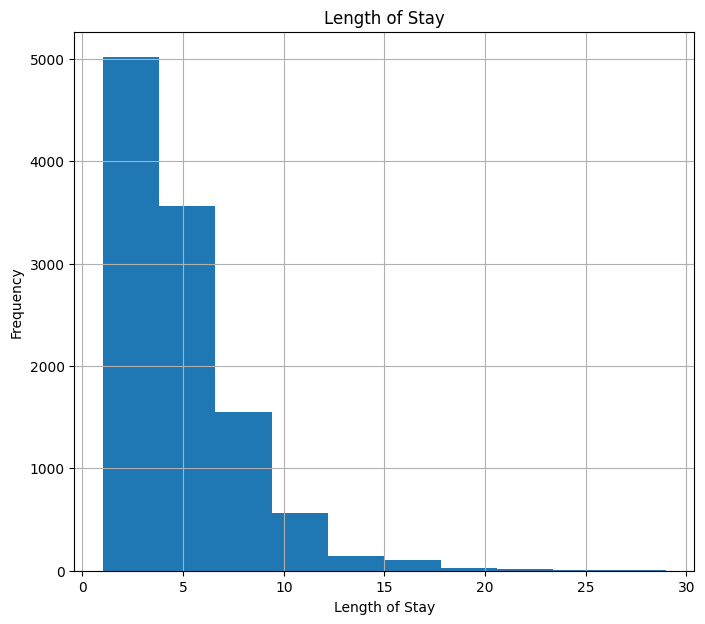

In [ ]:
# Dependent variable

plt.figure(figsize=(8,7))
EDA_dataset.LengthOfStay.hist()
plt.title('Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')
plt.show()

1. As the days increases, patients count decreases, which is realistic. Data is not normal, instead it is right skewed.



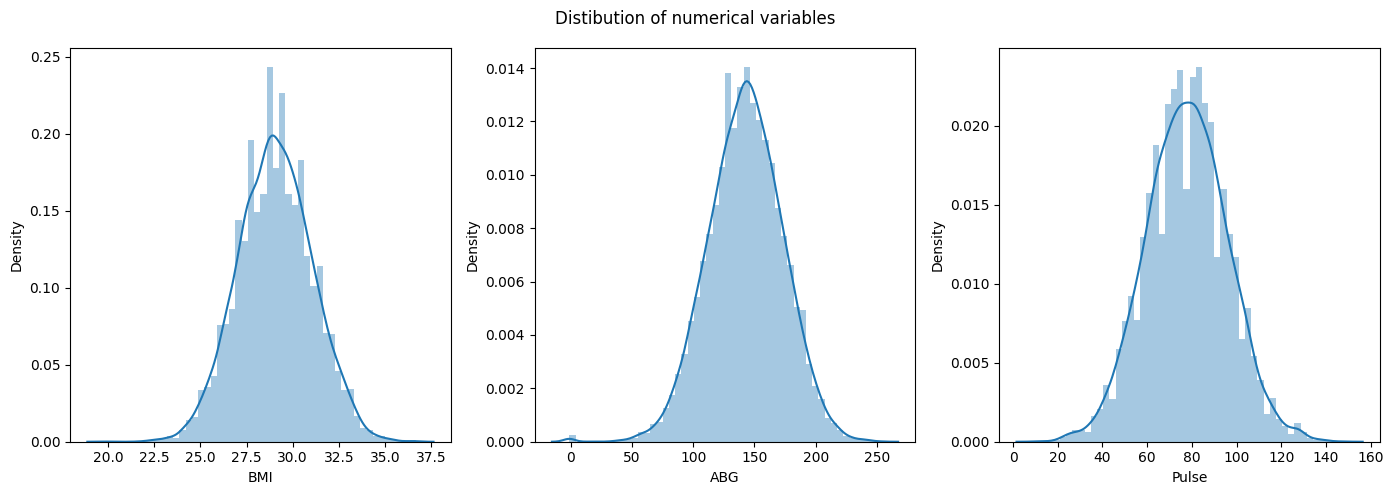

In [ ]:
# Distributions of numerical columns


plt.figure(figsize=(14, 5))

for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.distplot(patients_data[col])
    plt.xlabel(col, fontsize=10)

plt.suptitle('Distibution of numerical variables')
plt.tight_layout()
plt.show()

**Observations**:

1. All the numerical variables are normal, it makes easy to develop a good model. Transformation is not required.

In [ ]:
considered_categorical_features

['ReadmissionCount', 'Gender', 'SubstanceAbuseHistory', 'SecondaryDiagnosis']

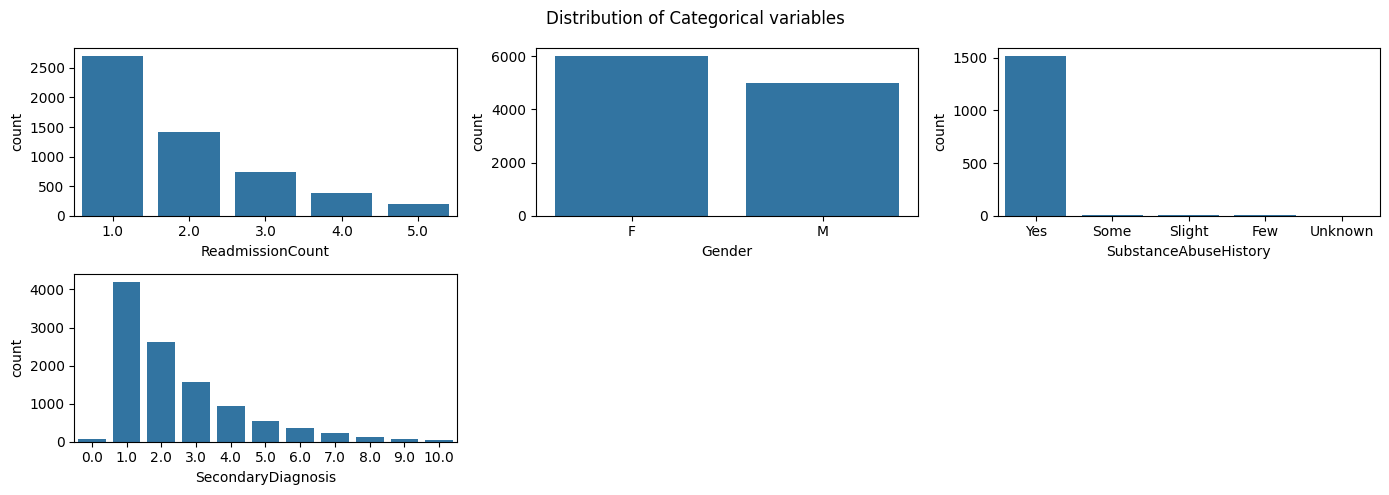

In [ ]:
# distribution of Categorical features.
plt.figure(figsize=(14, 5))

for i, column in enumerate(considered_categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=patients_data[column])
    plt.xlabel(column, fontsize=10)


plt.suptitle('Distribution of Categorical variables')
plt.tight_layout()
plt.show()

**Observations**


1.   Gender Distribution: There are more female patients in the hospital compared to males.

2.   Readmission Trends: As previously noted, the likelihood of readmission decreases with the length of hospital stay. However, nearly all patients have been readmitted at least once.

3.  Substance Abuse: There is a significant amount of missing data regarding substance abuse, with 99% of patients having a documented history of substance abuse.

4.  Secondary Diagnosis: The category 1 is the most common secondary diagnosis among patients.








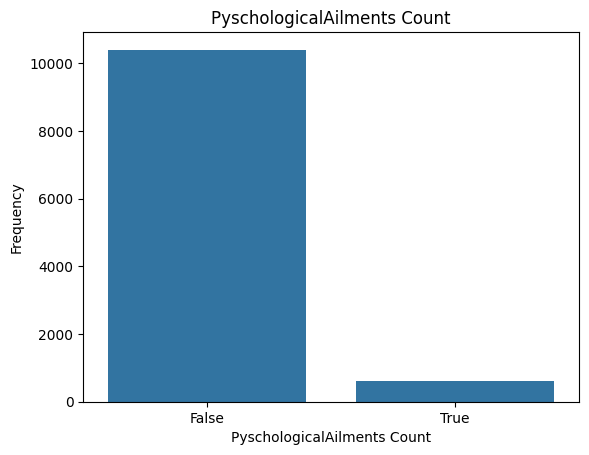

In [ ]:
sns.countplot(x='PyschologicalAilments', data=patients_data)
plt.title('PyschologicalAilments Count')
plt.xlabel('PyschologicalAilments Count')
plt.ylabel('Frequency')
plt.show()

There are only few patients with pyschological ailment.

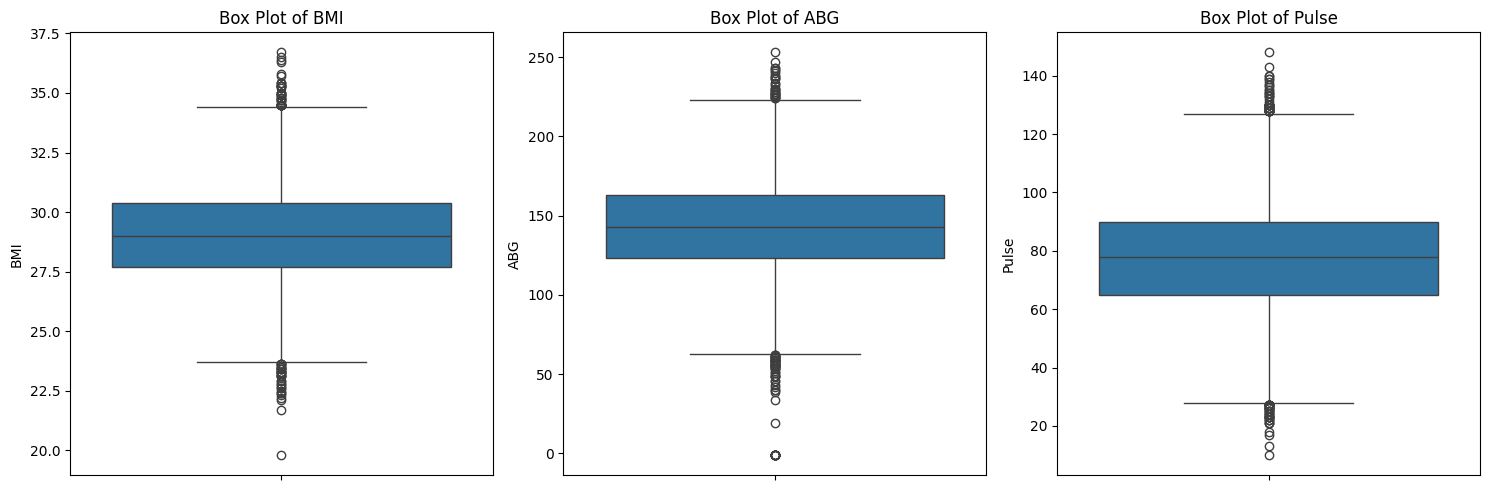

In [ ]:
# Box plots to see for outliers

fig, axs = plt.subplots(1, len(numerical_features), figsize=(15, 5))

# Plotting box plots
for i, var in enumerate(numerical_features):
    sns.boxplot(y=EDA_dataset[var], ax=axs[i])
    axs[i].set_title(f"Box Plot of {var}")
    axs[i].set_ylabel(var)

plt.tight_layout()
plt.show()

**Observations**

1. BMI: The dataset contains extreme values for BMI, which may indicate severe obesity. While these extreme values will not be removed, they will be monitored. If they adversely affect model performance, capping techniques will be applied to handle these outliers.







In [ ]:
considered_outlier_features

['ABG', 'Pulse']

**Bi-Variate Analyses**

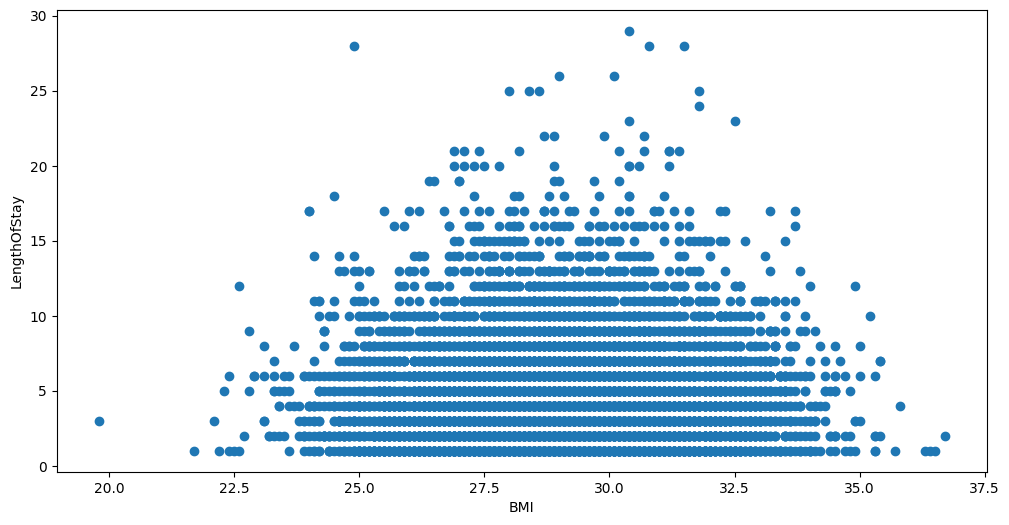

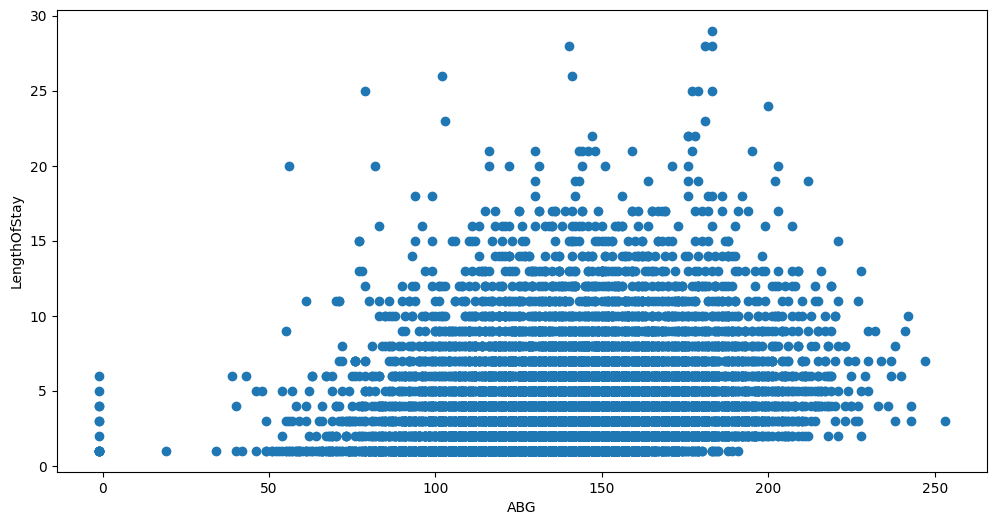

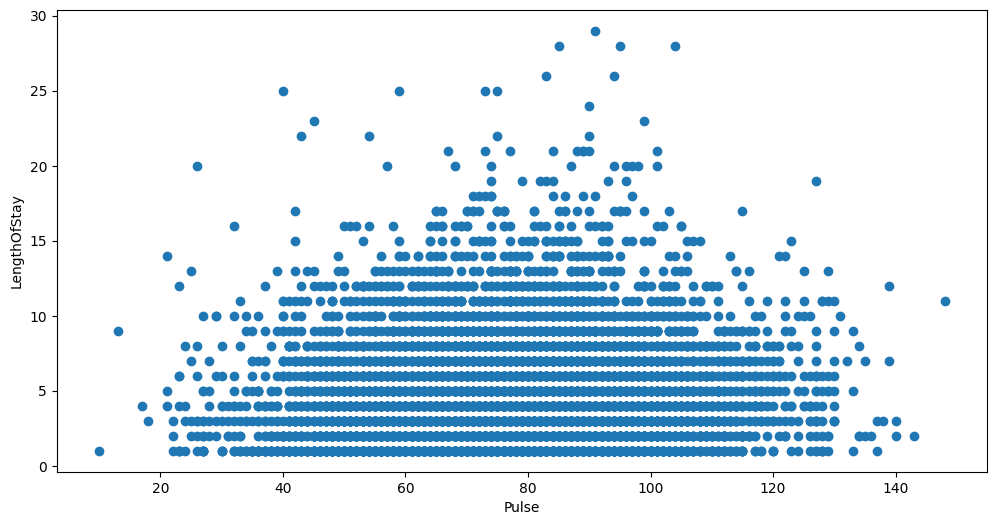

In [ ]:
for col in numerical_features:

  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca()
  feature = patients_data[col]
  label = EDA_dataset['LengthOfStay']

  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.


  plt.xlabel(col)
  plt.ylabel('LengthOfStay')

plt.show()

**Observations**

1. There is no clear linear relationhip between independent variables and dependent variable, which is one of the assumptions of linear regression.

In [ ]:
considered_categorical_features

['ReadmissionCount', 'Gender', 'SubstanceAbuseHistory', 'SecondaryDiagnosis']

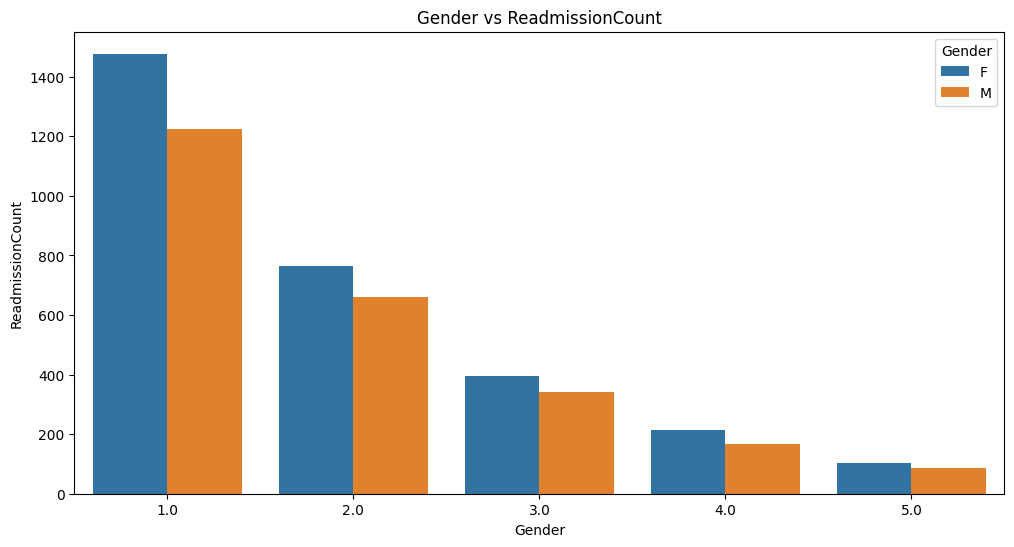

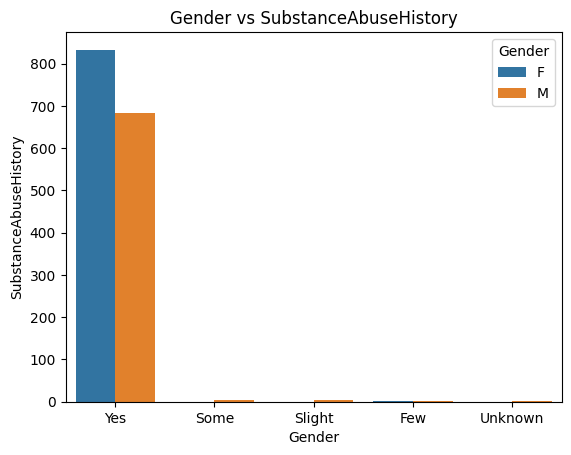

In [ ]:
# gender vs readmission count, substance abuse history


plt.figure(figsize=(12, 6))

for col in ['ReadmissionCount', 'SubstanceAbuseHistory']:
    sns.countplot(x=EDA_dataset[col], hue=patients_data['Gender'], data=EDA_dataset)
    plt.title(f'Gender vs {col  }')
    plt.xlabel('Gender')
    plt.ylabel(col)
    plt.legend(title='Gender')
    plt.show()



Females are being readmitted more and having substance history.

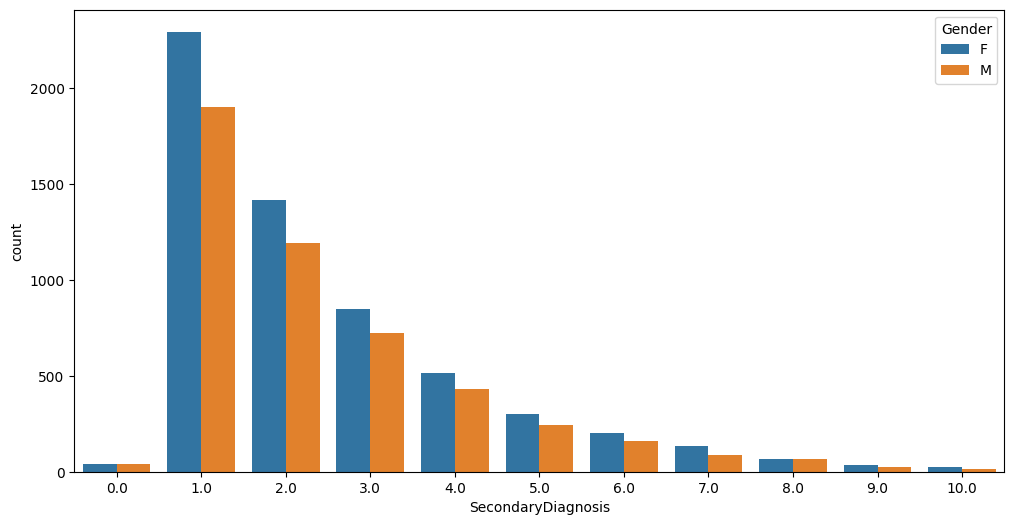

In [ ]:
# Gender vs Secondary Diagnosis

plt.figure(figsize=(12, 6))

for col in ['SecondaryDiagnosis']:
    sns.countplot(x=EDA_dataset[col], hue=patients_data['Gender'], data=EDA_dataset)




In [ ]:
EDA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     10999 non-null  int64  
 1   ReadmissionCount       5429 non-null   float64
 2   Gender                 10999 non-null  object 
 3   FacilityId             10999 non-null  int64  
 4   PyschologicalAilments  10999 non-null  bool   
 5   SubstanceAbuseHistory  1527 non-null   object 
 6   BMI                    10997 non-null  float64
 7   ABG                    10999 non-null  float64
 8   Pulse                  10997 non-null  float64
 9   SecondaryDiagnosis     10760 non-null  float64
 10  LengthOfStay           10999 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 870.2+ KB


In [ ]:
independent_variables

['Id',
 'ReadmissionCount',
 'Gender',
 'FacilityId',
 'PyschologicalAilments',
 'SubstanceAbuseHistory',
 'BMI',
 'ABG',
 'Pulse',
 'SecondaryDiagnosis']

In [ ]:
correlation_map=['ReadmissionCount','FacilityId','BMI','Pulse','SecondaryDiagnosis','PyschologicalAilments','LengthOfStay']

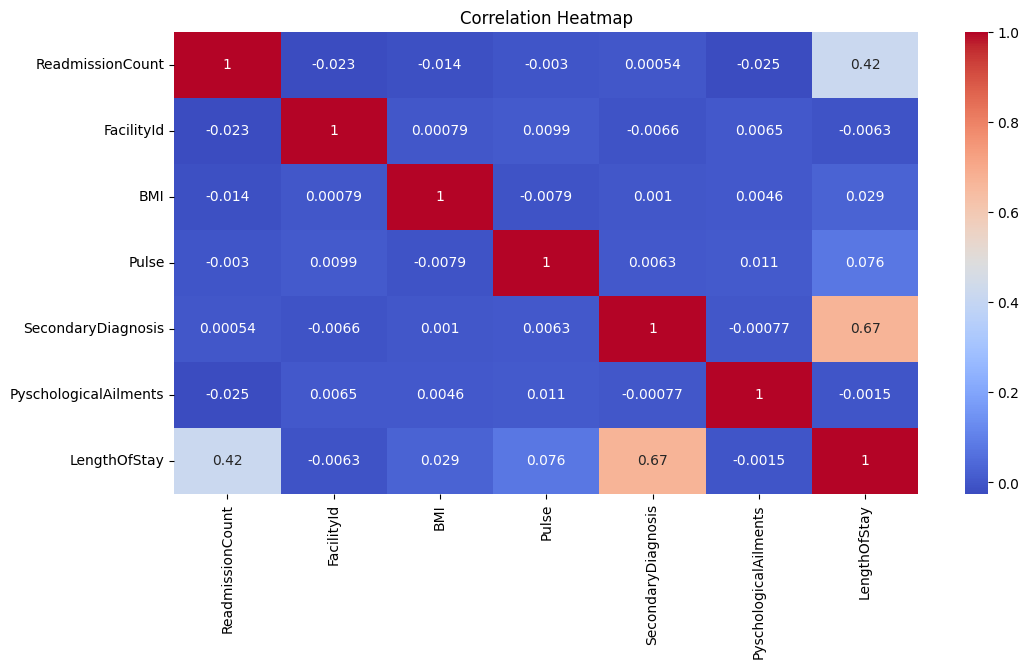

In [ ]:
# Correlation Heatmap



plt.figure(figsize=(12, 6))
sns.heatmap(EDA_dataset[correlation_map].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observations**:

1. SecondaryDiagnosis and Readmission count are positively correlated to Length of stay.


# Splitting the dataset

In [ ]:
split_dataset=EDA_dataset.copy()
split_dataset.head()

,Id,ReadmissionCount,Gender,FacilityId,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis,LengthOfStay
0,13564856414,2.0,F,1338,False,NaN,32.7,152.0,64.0,2.0,5
1,13564856415,1.0,F,4964,True,NaN,31.1,165.0,105.0,1.0,3
2,13564856416,NaN,M,7593,False,NaN,32.4,111.0,53.0,NaN,6
3,13564856417,NaN,M,1739,False,NaN,31.2,175.0,44.0,3.0,5
4,13564856418,NaN,M,1703,False,Yes,31.9,114.0,93.0,4.0,5


In [ ]:
split_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     10999 non-null  int64  
 1   ReadmissionCount       5429 non-null   float64
 2   Gender                 10999 non-null  object 
 3   FacilityId             10999 non-null  int64  
 4   PyschologicalAilments  10999 non-null  bool   
 5   SubstanceAbuseHistory  1527 non-null   object 
 6   BMI                    10997 non-null  float64
 7   ABG                    10999 non-null  float64
 8   Pulse                  10997 non-null  float64
 9   SecondaryDiagnosis     10760 non-null  float64
 10  LengthOfStay           10999 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 870.2+ KB


ID and Facility ID: These columns represent unique identifiers and do not contribute to model development. Therefore, they will be dropped from the dataset.

In [ ]:
# dropping the columns
split_dataset.drop(['Id','FacilityId'],axis=1,inplace=True)


In [ ]:
# dropping SubstanceAbuseHistory as it has more than 85% of data missing. It will not contribute to the model.
split_dataset.drop(['SubstanceAbuseHistory'],axis=1,inplace=True)

In [ ]:
split_dataset.head()

,ReadmissionCount,Gender,PyschologicalAilments,BMI,ABG,Pulse,SecondaryDiagnosis,LengthOfStay
0,2.0,F,False,32.7,152.0,64.0,2.0,5
1,1.0,F,True,31.1,165.0,105.0,1.0,3
2,NaN,M,False,32.4,111.0,53.0,NaN,6
3,NaN,M,False,31.2,175.0,44.0,3.0,5
4,NaN,M,False,31.9,114.0,93.0,4.0,5


In [ ]:
split_dataset.isnull().sum()

ReadmissionCount         5570
Gender                      0
PyschologicalAilments       0
BMI                         2
ABG                         0
Pulse                       2
SecondaryDiagnosis        239
LengthOfStay                0
dtype: int64

In [ ]:
# filling missing values of categorical variables
#Because, missing values indicates either missing entry or data entry error. In this case we are considering missing values as the patient did not readmit at all.

split_dataset['ReadmissionCount'].fillna(0, inplace=True)




In [ ]:
split_dataset.isnull().sum()

ReadmissionCount           0
Gender                     0
PyschologicalAilments      0
BMI                        2
ABG                        0
Pulse                      2
SecondaryDiagnosis       239
LengthOfStay               0
dtype: int64

splitting the dataset into 80% train and 20% for test before preprocessing to avoid data leakage.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(split_dataset.drop(['LengthOfStay'],axis=1), split_dataset['LengthOfStay'], test_size=0.2, random_state=42)

In [ ]:
# shapes of the resulting datasets
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8799, 7)
X_test shape: (2200, 7)
y_train shape: (8799,)
y_test shape: (2200,)


# Feature Engineering and Data Pre-Processing

**Missing Values**

In [ ]:
x_train.isnull().sum()

ReadmissionCount           0
Gender                     0
PyschologicalAilments      0
BMI                        1
ABG                        0
Pulse                      1
SecondaryDiagnosis       184
dtype: int64

In [ ]:
x_test.isnull().sum()

ReadmissionCount          0
Gender                    0
PyschologicalAilments     0
BMI                       1
ABG                       0
Pulse                     1
SecondaryDiagnosis       55
dtype: int64

In [ ]:
# BMI and Pulse using median to fill data

median_BMI=x_train['BMI'].median()
median_Pulse=x_train['Pulse'].median()

x_train['BMI'].fillna(median_BMI,inplace=True)
x_test['BMI'].fillna(median_BMI,inplace=True)

x_train['Pulse'].fillna(median_Pulse,inplace=True)
x_test['Pulse'].fillna(median_Pulse,inplace=True)


# SecondaryDiagnosis

mode_secondary_diagnosis = x_train['SecondaryDiagnosis'].mode()[0]

x_train['SecondaryDiagnosis'].fillna(mode_secondary_diagnosis, inplace=True)
x_test['SecondaryDiagnosis'].fillna(mode_secondary_diagnosis, inplace=True)

1. BMI and Pulse: Due to the presence of outliers, imputing these values with the mean might be skewed. Instead, the mode has been used for imputation to better handle extreme values.

2. Secondary Diagnosis: The most common category for Secondary Diagnosis is 1.0. Therefore, missing values for this feature were imputed using the mode.

3. Data Leakage Prevention: Mode and median calculations were performed only on the training data and applied to the test data to avoid data leakage.

In [ ]:
x_test.isnull().sum()

ReadmissionCount         0
Gender                   0
PyschologicalAilments    0
BMI                      0
ABG                      0
Pulse                    0
SecondaryDiagnosis       0
dtype: int64

In [ ]:
x_train.isnull().sum()

ReadmissionCount         0
Gender                   0
PyschologicalAilments    0
BMI                      0
ABG                      0
Pulse                    0
SecondaryDiagnosis       0
dtype: int64

In [ ]:
x_train.head()

,ReadmissionCount,Gender,PyschologicalAilments,BMI,ABG,Pulse,SecondaryDiagnosis
8965,5.0,M,False,30.5,106.0,50.0,4.0
5936,0.0,M,False,27.3,167.0,75.0,3.0
10656,3.0,M,False,27.6,137.0,92.0,2.0
3328,1.0,F,False,31.7,139.0,79.0,1.0
9880,1.0,M,False,29.7,147.0,76.0,1.0


**Handling Outliers**

In [ ]:
considered_outlier_features

['ABG', 'Pulse']

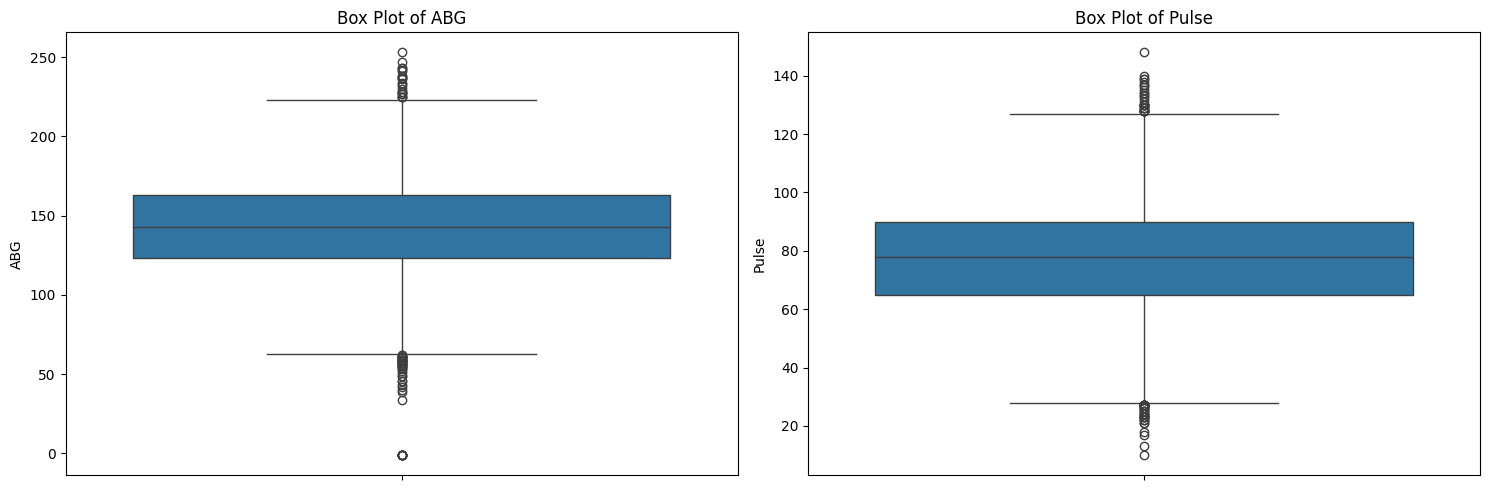

In [ ]:
fig, axs = plt.subplots(1, len(considered_outlier_features), figsize=(15, 5))

# Plotting box plots
for i, var in enumerate(considered_outlier_features):
    sns.boxplot(y=x_train[var], ax=axs[i])
    axs[i].set_title(f"Box Plot of {var}")
    axs[i].set_ylabel(var)

plt.tight_layout()
plt.show()

In [ ]:

# Function to calculate lower and upper limits for capping
def calculate_limits(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR

    return lower_limit

# Calculating limits for Pulse
pulse_lower_limit = calculate_limits(x_train['Pulse'])

# Calculating limits for ABG
abg_lower_limit = calculate_limits(x_train['ABG'])


# Function to cap outliers
def cap_outliers(series, lower_limit):
    return series.clip(lower=lower_limit)

# Capping outliers for Pulse
x_train['Pulse'] = cap_outliers(x_train['Pulse'], pulse_lower_limit)

# Cap outliers for ABG
x_train['ABG'] = cap_outliers(x_train['ABG'], abg_lower_limit)



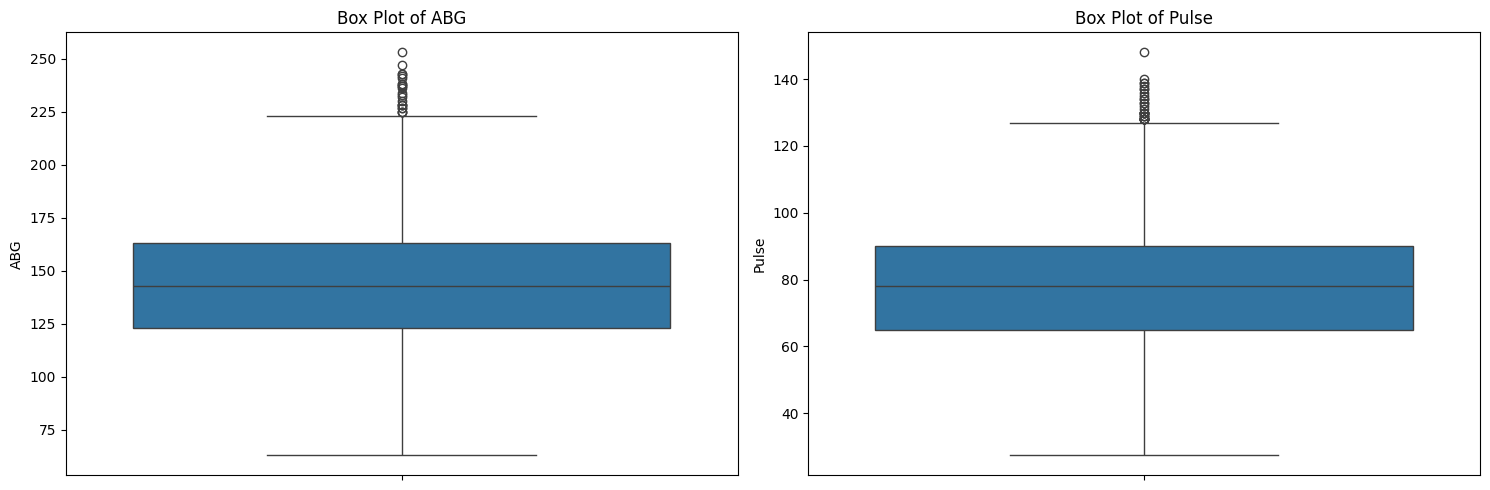

In [ ]:
fig, axs = plt.subplots(1, len(considered_outlier_features), figsize=(15, 5))

# Plotting box plots
for i, var in enumerate(considered_outlier_features):
    sns.boxplot(y=x_train[var], ax=axs[i])
    axs[i].set_title(f"Box Plot of {var}")
    axs[i].set_ylabel(var)

plt.tight_layout()
plt.show()

1. BMI and Pulse: Based on practical scenarios, feasible ranges for these variables were determined. Capping was applied to handle outliers and ensure that extreme values do not skew the data.

 **Categorical Encoding**

In [ ]:
x_train.head()

,ReadmissionCount,Gender,PyschologicalAilments,BMI,ABG,Pulse,SecondaryDiagnosis
8965,5.0,M,False,30.5,106.0,50.0,4.0
5936,0.0,M,False,27.3,167.0,75.0,3.0
10656,3.0,M,False,27.6,137.0,92.0,2.0
3328,1.0,F,False,31.7,139.0,79.0,1.0
9880,1.0,M,False,29.7,147.0,76.0,1.0


In [ ]:
# PyschologicalAilments converting into numeric form from boolean
x_train['PyschologicalAilments'] = x_train['PyschologicalAilments'].astype(int)
x_test['PyschologicalAilments'] = x_test['PyschologicalAilments'].astype(int)

In [ ]:
considered_categorical_features

['ReadmissionCount', 'Gender', 'SubstanceAbuseHistory', 'SecondaryDiagnosis']

In [ ]:
considered_categorical_features.remove('SubstanceAbuseHistory')
considered_categorical_features

['ReadmissionCount', 'Gender', 'SecondaryDiagnosis']

In [ ]:
# one hot encoding

onehot_encoder=OneHotEncoder(sparse=False)
x_train_encoded=onehot_encoder.fit_transform(x_train[considered_categorical_features])
x_test_encoded=onehot_encoder.transform(x_test[considered_categorical_features])


x_train_encoded=pd.DataFrame(x_train_encoded,columns=onehot_encoder.get_feature_names_out(considered_categorical_features))
x_test_encoded=pd.DataFrame(x_test_encoded,columns=onehot_encoder.get_feature_names_out(considered_categorical_features))

x_train=pd.concat([x_train.reset_index(drop=True).drop(considered_categorical_features,axis=1),x_train_encoded],axis=1)
x_test=pd.concat([x_test.reset_index(drop=True).drop(considered_categorical_features,axis=1),x_test_encoded],axis=1)


x_train.head()



,PyschologicalAilments,BMI,ABG,Pulse,ReadmissionCount_0.0,ReadmissionCount_1.0,ReadmissionCount_2.0,ReadmissionCount_3.0,ReadmissionCount_4.0,ReadmissionCount_5.0,...,SecondaryDiagnosis_1.0,SecondaryDiagnosis_2.0,SecondaryDiagnosis_3.0,SecondaryDiagnosis_4.0,SecondaryDiagnosis_5.0,SecondaryDiagnosis_6.0,SecondaryDiagnosis_7.0,SecondaryDiagnosis_8.0,SecondaryDiagnosis_9.0,SecondaryDiagnosis_10.0
0,0,30.5,106.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,27.3,167.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,27.6,137.0,92.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,31.7,139.0,79.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,29.7,147.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
x_test.head()

,PyschologicalAilments,BMI,ABG,Pulse,ReadmissionCount_0.0,ReadmissionCount_1.0,ReadmissionCount_2.0,ReadmissionCount_3.0,ReadmissionCount_4.0,ReadmissionCount_5.0,Gender_F,Gender_M,SecondaryDiagnosis_0.0,SecondaryDiagnosis_1.0,SecondaryDiagnosis_2.0,SecondaryDiagnosis_3.0,SecondaryDiagnosis_4.0,SecondaryDiagnosis_5.0,SecondaryDiagnosis_6.0,SecondaryDiagnosis_7.0,SecondaryDiagnosis_8.0,SecondaryDiagnosis_9.0,SecondaryDiagnosis_10.0
0,0,30.4,167.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,27.7,118.0,84.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,30.9,105.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,30.7,131.0,133.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,32.8,182.0,83.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(x_train.shape)
print(x_test.shape  )
print(y_train.shape)
print(y_test.shape  )

(8799, 23)
(2200, 23)
(8799,)
(2200,)


<Axes: >

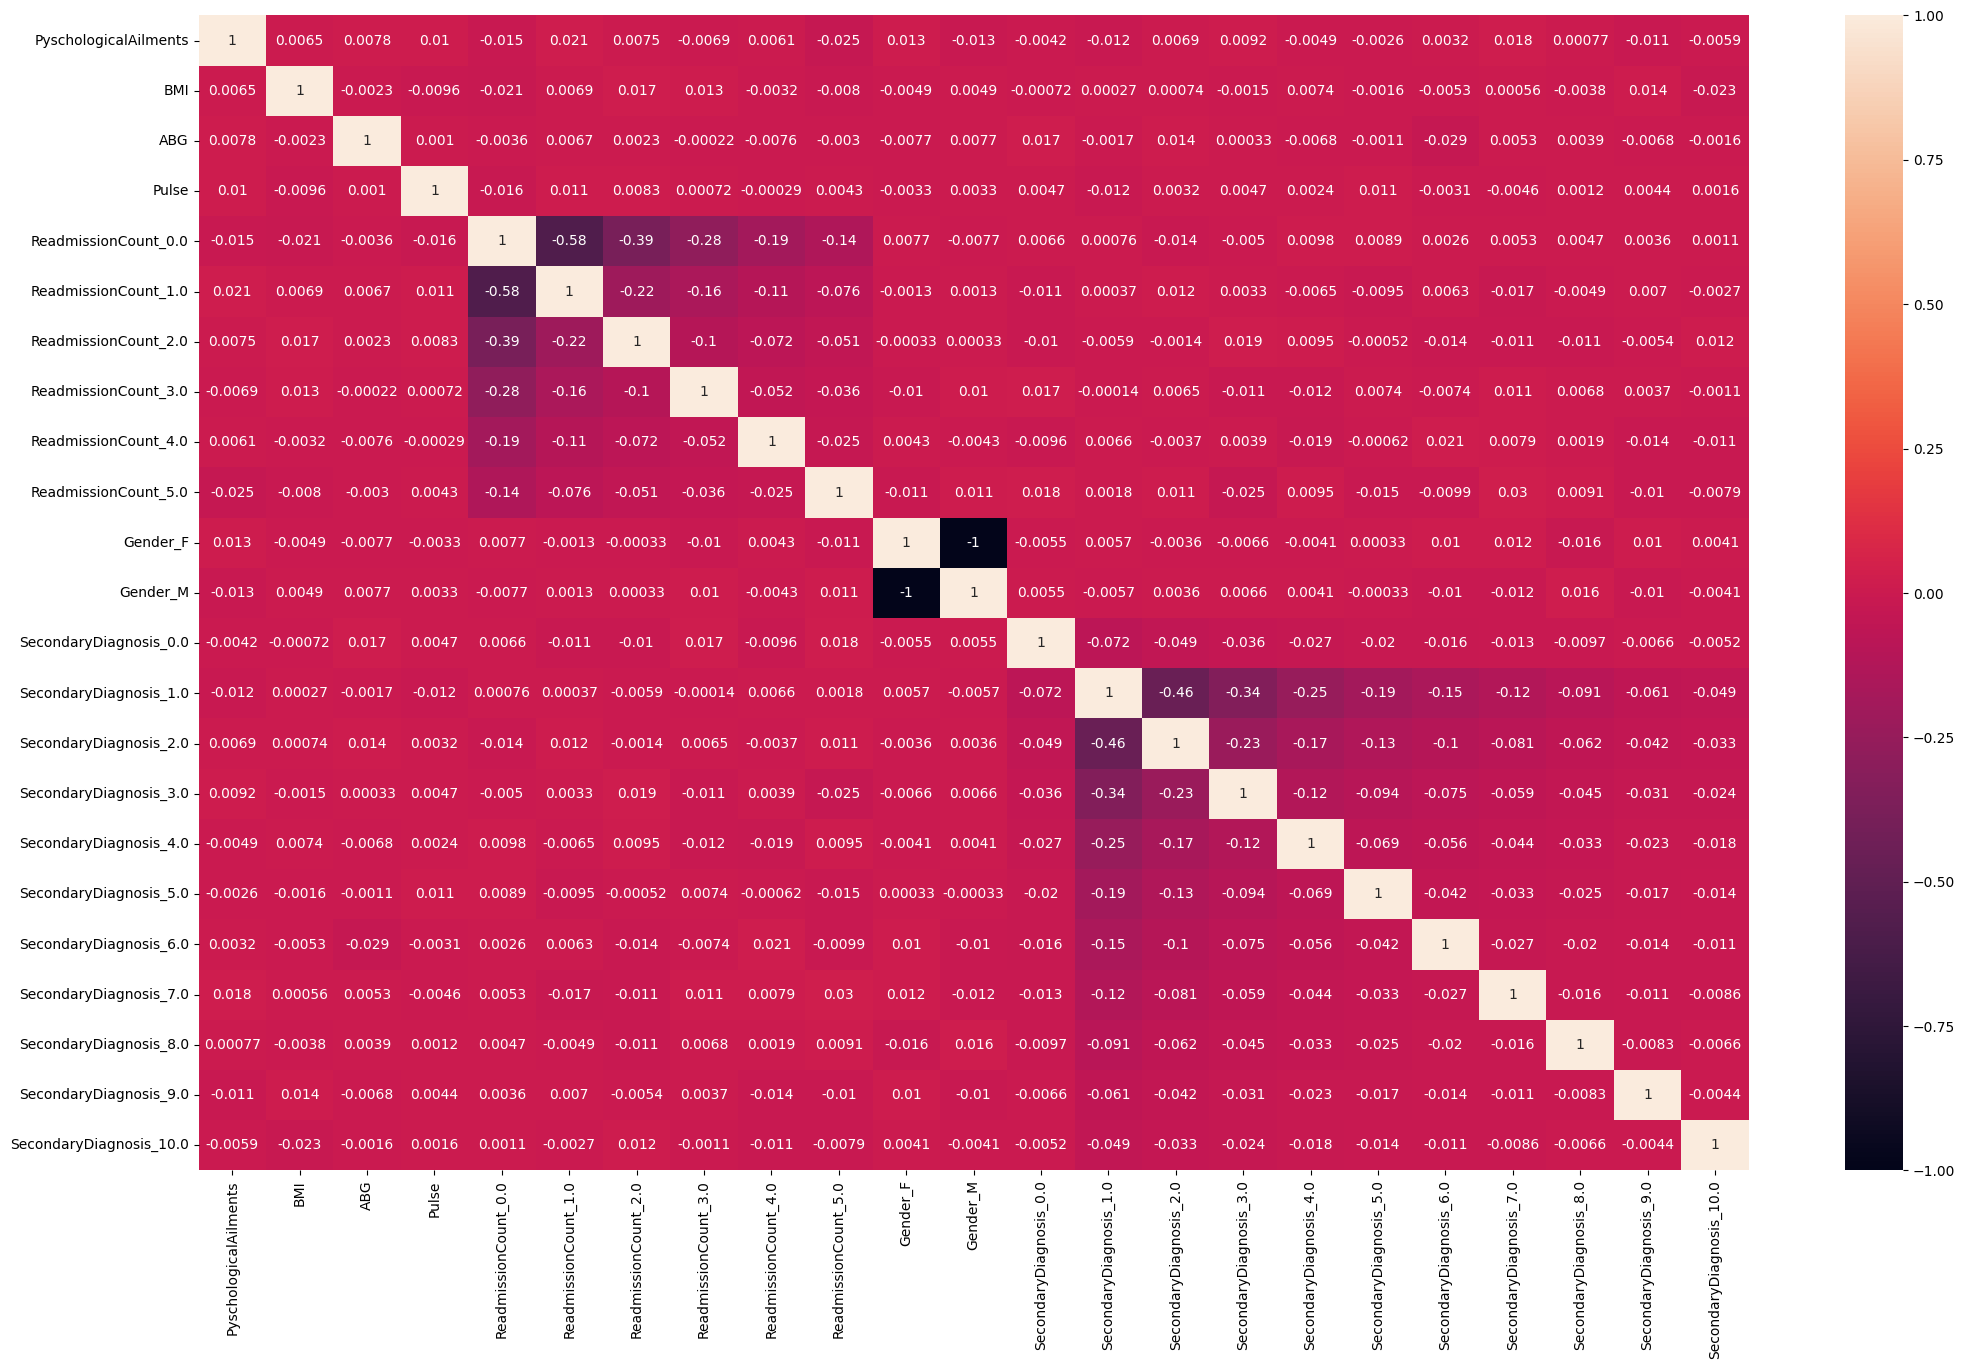

In [ ]:
plt.figure(figsize=(25, 15))
sns.heatmap(x_train.corr(),annot=True,)



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif2(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x_train.columns
    vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

    return(vif)



In [ ]:
calc_vif2(x_train[[i for i in x_train.describe().columns if i not in ['all encoded values']]])

,variables,VIF
0,PyschologicalAilments,1.002290
1,BMI,1.001716
2,ABG,1.001650
3,Pulse,1.000827
4,ReadmissionCount_0.0,inf
5,ReadmissionCount_1.0,inf
6,ReadmissionCount_2.0,inf
7,ReadmissionCount_3.0,inf
8,ReadmissionCount_4.0,inf
9,ReadmissionCount_5.0,inf


Variance Inflation Factor (VIF): VIF is used to detect multicollinearity among features. A VIF value below 10 generally indicates no significant multicollinearity. Features resulting from one-hot encoding may have an infinite VIF score and can be ignored in this context.

**Data Scaling**

In [ ]:
numerical_features

['BMI', 'ABG', 'Pulse']

In [ ]:
standard_scaler=StandardScaler()
x_train[numerical_features]=standard_scaler.fit_transform(x_train[numerical_features])
x_test[numerical_features]=standard_scaler.transform(x_test[numerical_features])

Standardization is required to bring all numerical columns to one standard scale. This is important for gradient descent to scale the data.

In [ ]:
x_test.head()

,PyschologicalAilments,BMI,ABG,Pulse,ReadmissionCount_0.0,ReadmissionCount_1.0,ReadmissionCount_2.0,ReadmissionCount_3.0,ReadmissionCount_4.0,ReadmissionCount_5.0,Gender_F,Gender_M,SecondaryDiagnosis_0.0,SecondaryDiagnosis_1.0,SecondaryDiagnosis_2.0,SecondaryDiagnosis_3.0,SecondaryDiagnosis_4.0,SecondaryDiagnosis_5.0,SecondaryDiagnosis_6.0,SecondaryDiagnosis_7.0,SecondaryDiagnosis_8.0,SecondaryDiagnosis_9.0,SecondaryDiagnosis_10.0
0,0,0.664842,0.819399,-1.247388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.681234,-0.827670,0.353963,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.914115,-1.264647,-1.247388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.814406,-0.390692,3.059693,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.861354,1.323604,0.298744,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building

**Linear Regression**

In [ ]:
Linear_Regression=LinearRegression()
Linear_Regression.fit(x_train,y_train)

y_pred_training_data=Linear_Regression.predict(x_train)
y_pred_test_data=Linear_Regression.predict(x_test)

In [ ]:
# Evaluation


# predicting on train data
LR_r2_training_data=r2_score(y_train, y_pred_training_data)
LR_mse_training_data=mean_squared_error(y_train, y_pred_training_data)
LR_mae_training_data=mean_absolute_error(y_train, y_pred_training_data)

# predicting on Testing data
LR_r2_test_data=r2_score(y_test, y_pred_test_data)
LR_mse_test_data=mean_squared_error(y_test, y_pred_test_data)
LR_mae_test_data=mean_absolute_error(y_test, y_pred_test_data)

# Training data
print(f"R2: {LR_r2_training_data}")
print(f"MSE: {LR_mse_training_data}")
print(f"MAE: {LR_mae_training_data}")

#Testing Data
print(f"R2: {LR_r2_test_data}")
print(f"MSE: {LR_mse_test_data}")
print(f"MAE: {LR_mae_test_data}")







R2: 0.8524493148665062
MSE: 1.6028975599069952
MAE: 0.5607735887407417
R2: 0.8118974852882457
MSE: 2.0857092871426977
MAE: 0.6214299774777341


In [ ]:
# Storing metrics in a DataFrame
metrics = {
    'Metric': ['R²', 'MSE', 'MAE'],
    'Train': [LR_r2_training_data, LR_mse_training_data, LR_mae_training_data],
    'Test': [LR_r2_test_data, LR_mse_test_data, LR_mae_test_data]
}

Evaluation_metrics_df = pd.DataFrame(metrics)

Evaluation_metrics_df

,Metric,Train,Test
0,R²,0.852449,0.811897
1,MSE,1.602898,2.085709
2,MAE,0.560774,0.621430


**Observations**:

The model is able to explain 81% of the variance in the target variable and has demonstrated strong performance on both the training and testing datasets.


In [ ]:
n = len(y_test)  # Number of observations
k = x_train.shape[1]  # Number of predictors
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(adjusted_r2)

0.8104178503697245


The number of predictors is appropriate for the number of observations. The Adjusted R² score, which accounts for the number of predictors, suggests that the additional predictors are beneficial to the model.



Currently, regularization is not required as there is no indication of overfitting. However, Ridge and Lasso regression will still be tested to evaluate their impact on model performance.

**Ridge Regression**

In [ ]:
Ridge_Regression=Ridge()
Ridge_Regression.fit(x_train,y_train)

y_pred_training_data=Ridge_Regression.predict(x_train)
y_pred_test_data=Ridge_Regression.predict(x_test)

In [ ]:
print(f"R2: {r2_score(y_train, y_pred_training_data)}")
print(f"MSE: {mean_squared_error(y_train, y_pred_training_data)}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_training_data)}")


#Testing data
print(f"R2: {r2_score(y_test, y_pred_test_data)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test_data)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_data)}")

R2: 0.8532673184736812
MSE: 1.5940112847619514
MAE: 0.542884102050259
R2: 0.8122620646074493
MSE: 2.081666776211207
MAE: 0.6032404269939471


**Hyper Parameter Tuning**

In [ ]:
param_grid = {'alpha': [0.00001,0.0001,0.001]}
grid_search = GridSearchCV(Ridge_Regression, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)

y_pred_training_data=grid_search.predict(x_train)
print(f"R2: {r2_score(y_train, y_pred_training_data)}")
y_pred_test_data=grid_search.predict(x_test)
print(f"R2: {r2_score(y_test, y_pred_test_data)}")

Best parameters: {'alpha': 0.001}
Best R2 score: 0.8525117568918358
R2: 0.8532942214941149
R2: 0.8124495431452524


There is no change in the score, even with minimum learning rate.

In [ ]:
lasso = Lasso()
param_grid = {'alpha': np.logspace(-4, -1, 50)}


grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)

y_pred_training_data=grid_search.predict(x_train)
print(f"R2: {r2_score(y_train, y_pred_training_data)}")

y_pred_test_data=grid_search.predict(x_test)
print(f"R2: {r2_score(y_test, y_pred_test_data)}")


Best parameters: {'alpha': 0.0001}
Best R2 score: 0.8525106909381448
R2: 0.8532933404842358
R2: 0.8124186186423854
